# Part 1

In [1]:
function A = warmUpExercise()
%WARMUPEXERCISE Example function in octave
%   A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix

% ============= YOUR CODE HERE ==============
% Instructions: Return the 5x5 identity matrix 
%               In octave, we return values by defining which variables
%               represent the return values (at the top of the file)
%               and then set them accordingly. 
% ===========================================

A = eye(5);
end

In [2]:
function plotData(x, y)
%PLOTDATA Plots the data points x and y into a new figure 
%   PLOTDATA(x,y) plots the data points and gives the figure axes labels of
%   population and profit.

figure; % open a new figure window

% ====================== YOUR CODE HERE ======================
% Instructions: Plot the training data into a figure using the 
%               "figure" and "plot" commands. Set the axes labels using
%               the "xlabel" and "ylabel" commands. Assume the 
%               population and revenue data have been passed in
%               as the x and y arguments of this function.
%
% Hint: You can use the 'rx' option with plot to have the markers
%       appear as red crosses. Furthermore, you can make the
%       markers larger by using plot(..., 'rx', 'MarkerSize', 10);
% ============================================================
plot(x, y, 'rx')
end

In [3]:
function J = computeCost(X, y, theta)
%COMPUTECOST Compute cost for linear regression
%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

m = length(y); 
costs = ((X*theta) - y).^2;
J = (sum(costs)) / (2*m);
end

In [4]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

m = length(y); 
J_history = zeros(num_iters, 1);

for iter = 1:num_iters
    J_history(iter) = computeCost(X, y, theta);
    temp_theta = theta;
    for j = 1:length(theta)
        temp_theta(j) = theta(j) - alpha * computeCostDerivative(X, y, theta, j);
    end
    theta = temp_theta;
end
end

function result =  computeCostDerivative(X, y, theta, j)
    m = length(y);
    dcosts = (X*theta - y).*X(:, j);
    result =  sum(dcosts) / m;
end


Running warmUpExercise ... 
5x5 Identity Matrix: 
ans =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1

Program paused. Press enter to continue.


Paused, enter any value to continue 


Plotting Data ...
Program paused. Press enter to continue.


Paused, enter any value to continue 



Testing the cost function ...
With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24
Program paused. Press enter to continue.


Paused, enter any value to continue 



Running Gradient Descent ...
Theta found by gradient descent:
-3.630291
1.166362
Expected theta values (approx)
 -3.6303
  1.1664

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
Program paused. Press enter to continue.


Paused, enter any value to continue 


Visualizing J(theta_0, theta_1) ...


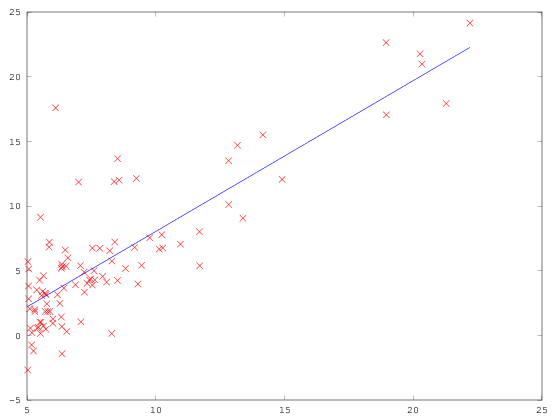

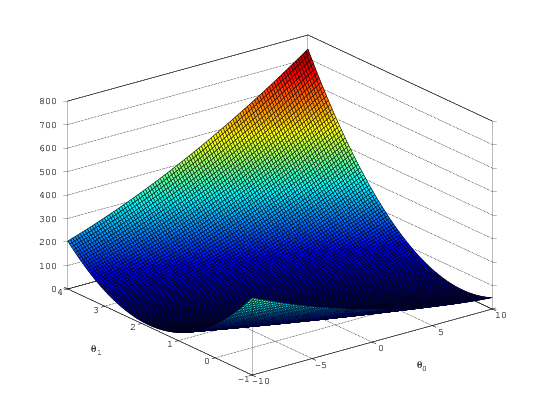

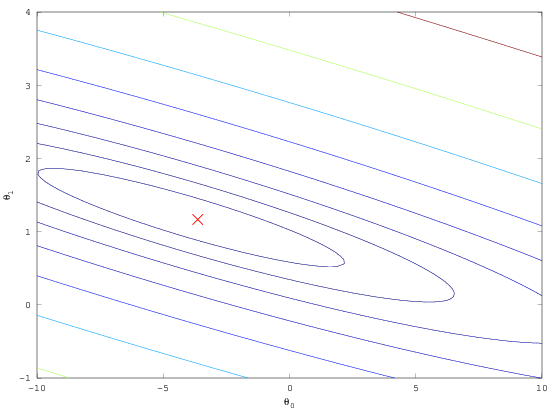

In [5]:
%% Machine Learning Online Class - Exercise 1: Linear Regression

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%
% x refers to the population size in 10,000s
% y refers to the profit in $10,000s
%

%% Initialization
clear ; close all; clc

%% ==================== Part 1: Basic Function ====================
% Complete warmUpExercise.m
fprintf('Running warmUpExercise ... \n');
fprintf('5x5 Identity Matrix: \n');
warmUpExercise()

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ======================= Part 2: Plotting =======================
fprintf('Plotting Data ...\n')
data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
% Note: You have to complete the code in plotData.m
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =================== Part 3: Cost and Gradient descent ===================

X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

fprintf('\nTesting the cost function ...\n')
% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');

% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');

fprintf('Program paused. Press enter to continue.\n');
pause;

fprintf('\nRunning Gradient Descent ...\n')
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

% Plot the linear fit
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
%legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);

# Part 2

In [7]:
function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

% You need to set these values correctly
X_norm = X;
mu = zeros(1, size(X, 2));
sigma = zeros(1, size(X, 2));

mu = mean(X);
sigma = std(X);
X_norm = (X - mu) ./ sigma;


end

In [11]:
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

m = length(y); 
J_history = zeros(num_iters, 1);

for iter = 1:num_iters
    J_history(iter) = computeCost(X, y, theta);
    temp_theta = theta;
    for j = 1:length(theta)
        temp_theta(j) = theta(j) - alpha * computeCostDerivative(X, y, theta, j);
    end
    theta = temp_theta;
end

end

function result =  computeCostDerivative(X, y, theta, j)
    m = length(y);
    dcosts = (X*theta - y).*X(:, j);
    result =  sum(dcosts) / m;
end

In [12]:
function [theta] = normalEqn(X, y)
%NORMALEQN Computes the closed-form solution to linear regression 
%   NORMALEQN(X,y) computes the closed-form solution to linear 
%   regression using the normal equations.

theta = zeros(size(X, 2), 1);

theta = pinv(X'*X) * (X'*y);

end


Loading data ...
First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 
Program paused. Press enter to continue.


Paused, enter any value to continue 


Normalizing Features ...
Running gradient descent ...
Theta computed from gradient descent: 
 334302.063993 
 100087.116006 
 3673.548451 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $402476.751410
Program paused. Press enter to continue.


Paused, enter any value to continue 


Solving with normal equations...
Theta computed from the normal equations: 
 89597.909542 
 139.210674 
 -8738.019112 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335


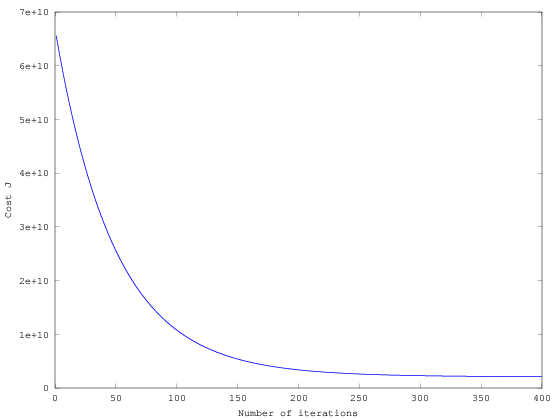

In [13]:
%% Machine Learning Online Class
%  Exercise 1: Linear regression with multiple variables
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear regression exercise. 
%
%  You will need to complete the following functions in this 
%  exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this part of the exercise, you will need to change some
%  parts of the code below for various experiments (e.g., changing
%  learning rates).
%

%% Initialization

%% ================ Part 1: Feature Normalization ================

%% Clear and Close Figures
clear ; close all; clc

fprintf('Loading data ...\n');

%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

fprintf('Program paused. Press enter to continue.\n');
pause;

% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);

% Add intercept term to X
X = [ones(m, 1) X];


%% ================ Part 2: Gradient Descent ================

% ====================== YOUR CODE HERE ======================
% Instructions: We have provided you with the following starter
%               code that runs gradient descent with a particular
%               learning rate (alpha). 
%
%               Your task is to first make sure that your functions - 
%               computeCost and gradientDescent already work with 
%               this starter code and support multiple variables.
%
%               After that, try running gradient descent with 
%               different values of alpha and see which one gives
%               you the best result.
%
%               Finally, you should complete the code at the end
%               to predict the price of a 1650 sq-ft, 3 br house.
%
% Hint: By using the 'hold on' command, you can plot multiple
%       graphs on the same figure.
%
% Hint: At prediction, make sure you do the same feature normalization.
%

fprintf('Running gradient descent ...\n');

% Choose some alpha value
alpha = 0.01;
num_iters = 400;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');

% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
% Recall that the first column of X is all-ones. Thus, it does
% not need to be normalized.
entry = [1, featureNormalize([1650, 3])];
price = entry * theta; % You should change this


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ================ Part 3: Normal Equations ================

fprintf('Solving with normal equations...\n');

% ====================== YOUR CODE HERE ======================
% Instructions: The following code computes the closed form 
%               solution for linear regression using the normal
%               equations. You should complete the code in 
%               normalEqn.m
%
%               After doing so, you should complete this code 
%               to predict the price of a 1650 sq-ft, 3 br house.
%

%% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');


% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
entry = [1, 1650, 3];
price = entry * theta;


% ============================================================
fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);